# 1] Importing the libraries

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2] Reading The Data

In [99]:
data=pd.read_excel(r'C:\Users\HP\SHUBHAM PYTHON\Sample - Superstore.xls',header=0)

In [100]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [101]:
data.shape

(9994, 21)

In [102]:
data["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [103]:
furniture=data[data["Category"]=="Furniture"] # subsetting the required category with a new variable 

In [104]:
furniture.shape

(2121, 21)

In [105]:
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [106]:
# If you want to convert the variable to date time 
##furniture['Order Date']=pd.to_datetime(furniture['Order Date'])

Here we can see that there are 2 variables which have datetime as dtype but we need only 'Order Date' so lets check the min and max order date

In [107]:
furniture['Order Date'].min(),furniture['Order Date'].max()
# Here we have got the minimum order date and the maximum order date

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [108]:
furniture=furniture[["Order Date","Sales"]]
furniture.shape
# Here we have tried subsetting the variable furniture with 2 variables 'Order Date','Sales'
# where 'Sales' is the variable of interest

(2121, 2)

In [109]:
# Here we want our data to go from lower order to higher order os we have sorted the order date to 
# ascending
furniture=furniture.sort_values("Order Date",ascending=True)

In [110]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [111]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [112]:
furniture["Order Date"].value_counts()
# Here we are checking the count of sales in each date

2016-09-05    10
2016-12-25     9
2016-12-01     9
2017-11-19     9
2017-10-30     9
              ..
2015-11-26     1
2015-11-24     1
2015-11-22     1
2015-11-19     1
2017-12-30     1
Name: Order Date, Length: 889, dtype: int64

In [113]:
furniture=furniture.groupby("Order Date")["Sales"].sum().reset_index()
# Here we have sumed up the sales value for the same date

In [114]:
furniture.shape

(889, 2)

In [115]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [116]:
furniture=furniture.set_index("Order Date")

In [117]:
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In the above code we can see that the dates are not equally spaced so inorder to make them equally spaced we use resample them 

In [118]:
y=furniture["Sales"].resample("M").mean()

In [119]:
print(y)

Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
2017-01-31     397.602133
2017-02-28     528.179800
2

In [120]:
print(y.shape)

(48,)


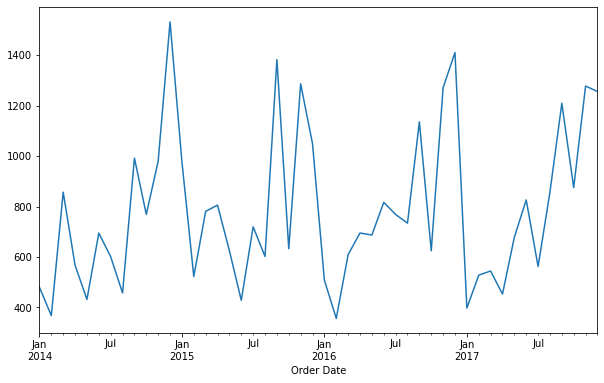

In [121]:
y.plot(figsize=(10,6))
plt.show()

Let us try splitting the above data into training and testing where till 2016 data will be passed into training and the last one year i.e 2017 will be passed to testing 

In [122]:
train = y.loc[:'2016-12-31'] # from start till 2016-12-31
train.tail()


Order Date
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: M, Name: Sales, dtype: float64

In [123]:
train.shape

(36,)

In [124]:
test = y.loc['2017-01-31':] # from 2017-01-31 till the end 
test.tail()

Order Date
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: M, Name: Sales, dtype: float64

In [125]:
test.shape

(12,)

# Plotting the data

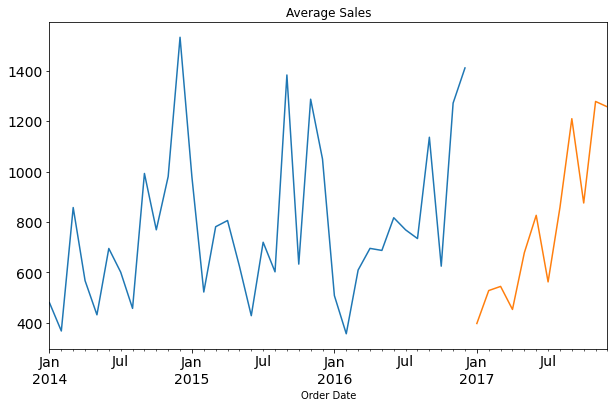

In [126]:
train.plot(figsize=(10,6),title="Average Sales",fontsize=14)
test.plot(figsize=(10,6),title="Average Sales",fontsize=14)
plt.show()

# Model Building

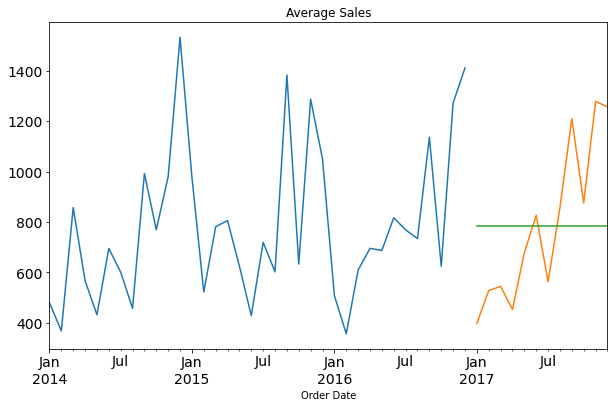

In [127]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 0 indicate that older values are very less imp compared to the recent values
#values close to 1 indicate that older values are equally imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.01)
# fit1 is a model object
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))
# whatever is the forcasted value will be stored in Exp_Smooth['SES'] 

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [128]:
# to check the errors between actual value and the predicted value
# choose the  model with the lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test,Exp_Smooth.SES))
print(rmse)

303.4766834364632


In [129]:
# AIC is used to compare different models with same Algo but different parameters
fit1.aic

415.87664216026513

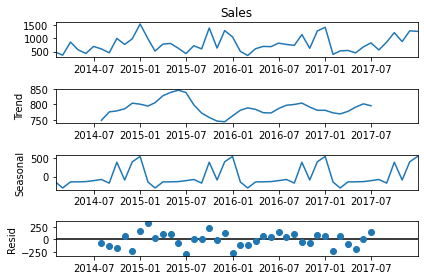

In [130]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(y)
fig=decomposition.plot()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  after removing the cwd from sys.path.


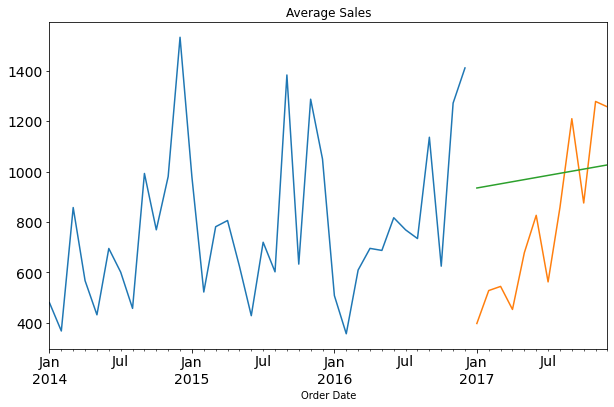

In [131]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing slope=beta
fit1 = Holt(train).fit(smoothing_level=0.01,smoothing_slope=0.25)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [132]:
fit1.aic

416.9527957653394

In [133]:
Holt_df['Holt_linear']

2017-01-31     934.738084
2017-02-28     943.061180
2017-03-31     951.384276
2017-04-30     959.707371
2017-05-31     968.030467
2017-06-30     976.353563
2017-07-31     984.676659
2017-08-31     992.999755
2017-09-30    1001.322851
2017-10-31    1009.645946
2017-11-30    1017.969042
2017-12-31    1026.292138
Freq: M, dtype: float64

In [134]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test,Holt_df['Holt_linear']))
print(rmse)

337.5381247724054


In case if you want to try with more alpha and beta values use the following below code

In [135]:
"""
import numpy as np
my_dict={}
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        #from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        #soothing slope=beta
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
        #Holt_df['Holt_linear'] = fit1.forecast(len(test))
        #print(fit1.aic,i,j)
        my_dict[i,j] = fit1.aic"""

"\nimport numpy as np\nmy_dict={}\nfor i in np.arange(0.01,1,0.01):\n    for j in np.arange(0.01,1,0.01):\n        #from statsmodels.tsa.api import Holt\n        Holt_df = test.copy()\n        #soothing slope=beta\n        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)\n        #Holt_df['Holt_linear'] = fit1.forecast(len(test))\n        #print(fit1.aic,i,j)\n        my_dict[i,j] = fit1.aic"

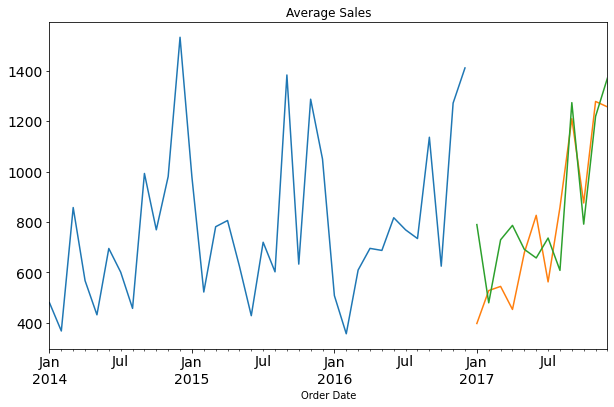

In [136]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiod=gamma
fit1 = ExponentialSmoothing(train,seasonal_periods=12,
                           trend='add', # for stable range use 'add', for increasing range use 'mul'
                           seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))

train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [137]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test,Holt_Winter_df['Holt_Winter']))
print(rmse)

193.71152837401434


In [138]:
Holt_Winter_df['Holt_Winter']

2017-01-31     789.680003
2017-02-28     479.584746
2017-03-31     729.439091
2017-04-30     786.559948
2017-05-31     691.434914
2017-06-30     657.425817
2017-07-31     736.375200
2017-08-31     608.142532
2017-09-30    1273.170684
2017-10-31     791.498424
2017-11-30    1218.795006
2017-12-31    1370.720631
Freq: M, dtype: float64

# ARIMA

In [ ]:
# p+q+P+Q<=10
# p+q<=3

In [139]:
import pmdarima as pm

In [140]:
"""
Box-Jenkins Method:
1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
2.Estimation-build the model using the optimum values
3.Validation-interpret how good is the model by validation testing
4.Forecasting- forecast for future time periods
"""

'\nBox-Jenkins Method:\n1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()\n2.Estimation-build the model using the optimum values\n3.Validation-interpret how good is the model by validation testing\n4.Forecasting- forecast for future time periods\n'

In [141]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)
#seasonal=True indicates that we want to preform SARIMA 

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.96 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.94 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.24 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.84 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=2.18 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.40 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.91 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=3.15 sec
 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=7.02 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=5.91 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=2.56 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=6.96 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=2.28 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, T

In [143]:
model.aic()

489.4176261246761

In [144]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(y,
             order=(3,2,0),seasonal_order=(1,1,0,12)).fit()
#order=(3,2,0) indicates p,d,q
#seasonal_order= (1,1,0,12) indicates p,d,q,m

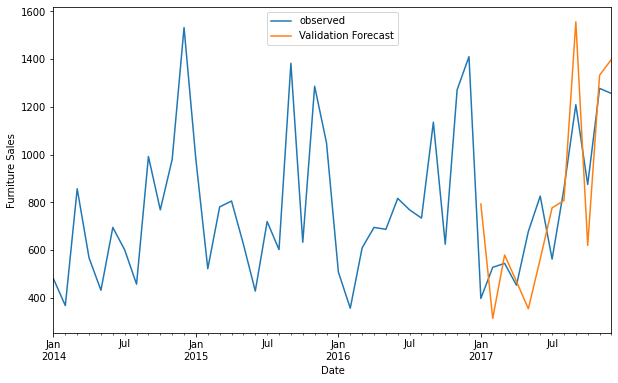

In [146]:
pred = model.get_prediction(start=pd.to_datetime('2017-01-31'))
#pred = model.get_forecast(steps=12)

plt.figure(figsize=(10,6))
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Validation Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [147]:
pred.predicted_mean

Order Date
2017-01-31     792.949435
2017-02-28     314.265630
2017-03-31     579.803129
2017-04-30     468.932389
2017-05-31     354.687212
2017-06-30     562.948847
2017-07-31     777.172661
2017-08-31     807.929710
2017-09-30    1556.342094
2017-10-31     620.158822
2017-11-30    1332.648293
2017-12-31    1399.290957
Freq: M, Name: predicted_mean, dtype: float64

In [148]:
Y_pred=pred.predicted_mean
Y_test=y['2017-01-31':]
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

230.06285374327294


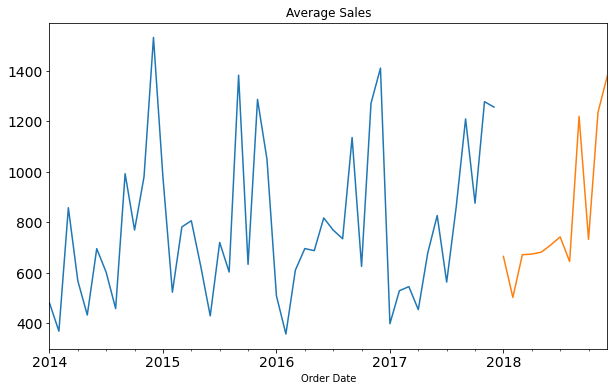

In [149]:
from statsmodels.tsa.api import ExponentialSmoothing
#seasonalperiod=gamma

fit1 = ExponentialSmoothing(y,seasonal_periods=12,
                           trend='add',
                           seasonal='add').fit()
Y_predictions = fit1.forecast(steps=12)

y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [150]:
Y_predictions

2018-01-31     664.252540
2018-02-28     501.710488
2018-03-31     670.931357
2018-04-30     673.636221
2018-05-31     681.138774
2018-06-30     709.586133
2018-07-31     741.805138
2018-08-31     644.130629
2018-09-30    1219.468339
2018-10-31     732.128714
2018-11-30    1235.229662
2018-12-31    1382.419846
Freq: M, dtype: float64

In [151]:
Y_predictions.to_excel("TimeSeriesOutput 2.xlsx",header=["Sales"],index=True)